## (1)  2호선 데이터 전처리 과정


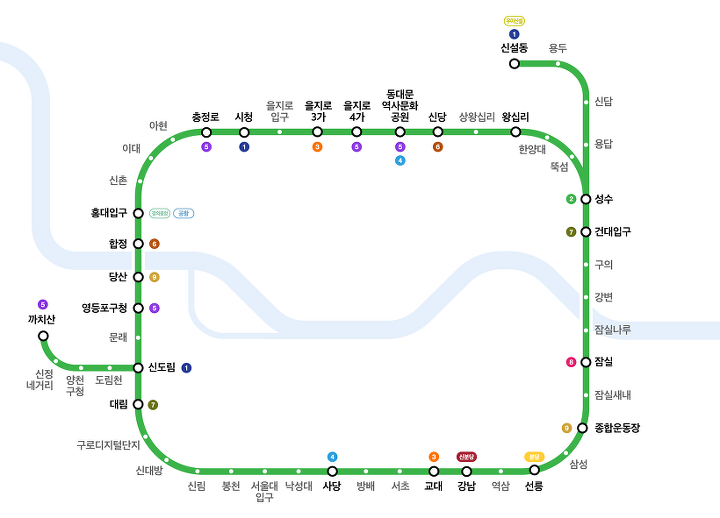

* 2호선 역의 개수 : 51개
#### 참고사항
* 2019년 12월 26일: 동대문역사문화공원역에서 동대문역사문화공원(DDP)역으로, 낙성대역에서 낙성대(강감찬)역으로 변경
* 2019년도 12월에 바뀐건데 안바뀌게 나타난 현상이 있었음

### 기본세팅

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#2호선 parquet 불러오기
second = pd.read_parquet("second_line_per_time.parquet")
second

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
0,2호선,강남,Monday,승차,228.0,597.0,1466.0,2427.0,1825.0,1655.0,...,3573.0,4581.0,5056.0,8314.0,14005.0,8680.0,6043.0,6842.0,5437.0,1384.0
1,2호선,강남,Monday,하차,469.0,2080.0,6457.0,13836.0,13276.0,5456.0,...,3484.0,3305.0,3189.0,3952.0,5854.0,3570.0,1558.0,1191.0,899.0,518.0
2,2호선,강남,Tuesday,승차,263.0,629.0,1519.0,2426.0,1815.0,1655.0,...,3634.0,4648.0,5193.0,8493.0,13841.0,8519.0,6260.0,7312.0,5933.0,1583.0
3,2호선,강남,Tuesday,하차,474.0,2018.0,6392.0,13747.0,13171.0,5480.0,...,3536.0,3353.0,3271.0,4164.0,6290.0,3903.0,1620.0,1266.0,1027.0,592.0
4,2호선,강남,Wednesday,승차,276.0,628.0,1508.0,2411.0,1801.0,1639.0,...,3615.0,4595.0,5121.0,8610.0,13689.0,8286.0,6016.0,7396.0,6221.0,1762.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,2호선,홍대입구,Thursday,하차,120.0,521.0,1240.0,3918.0,4013.0,2359.0,...,2878.0,2946.0,3188.0,4126.0,6153.0,4317.0,2014.0,1550.0,1376.0,1066.0
572,2호선,홍대입구,Friday,승차,505.0,794.0,2278.0,2873.0,1742.0,1206.0,...,1999.0,2415.0,3036.0,4164.0,5598.0,4001.0,3618.0,4750.0,4976.0,2025.0
573,2호선,홍대입구,Friday,하차,121.0,528.0,1210.0,3843.0,3956.0,2388.0,...,3164.0,3254.0,3646.0,4821.0,7508.0,5656.0,2528.0,1840.0,1632.0,1443.0
574,2호선,홍대입구,holiday,승차,724.0,582.0,554.0,682.0,823.0,929.0,...,2025.0,2458.0,3059.0,3523.0,3507.0,3414.0,3859.0,4530.0,3913.0,1382.0


In [3]:
#2호선 역명 확인
second["역명"].unique()

array(['강남', '강변(동서울터미널)', '건대입구', '교대(법원.검찰청)', '구로디지털단지', '구의(광진구청)',
       '낙성대(강감찬)', '당산', '대림(구로구청)', '도림천', '동대문역사문화공원', '뚝섬', '문래', '방배',
       '봉천', '사당', '삼성(무역센터)', '상왕십리', '서울대입구(관악구청)', '서초', '선릉', '성수',
       '시청', '신답', '신당', '신대방', '신도림', '신림', '신설동', '신정네거리', '신촌', '아현',
       '양천구청', '역삼', '영등포구청', '왕십리(성동구청)', '용답', '용두(동대문구청)', '을지로3가',
       '을지로4가', '을지로입구', '이대', '잠실(송파구청)', '잠실나루', '잠실새내', '종합운동장',
       '충정로(경기대입구)', '한양대', '합정', '홍대입구'], dtype=object)

# * 참고사항1

## * 2호선 역의 개수는 51개인데 데이터를 참고해보니 역의개수가 50개가 나타내어 있다. 이전 작업에서 오류가 있지 않았나 해서 살펴보니 오류가 없었다. 까치산역이 5호선과 환승역인데 5호선의 정보만 존재한다.

## * 결론 : 2호선 까치산역 누락!

### 1. 데이터 시각화를 위한 전처리 과정

### * 강남역부터 확인

In [4]:
#강남역
gangnam = second[second["역명"] == "강남"]
gangnam

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
0,2호선,강남,Monday,승차,228.0,597.0,1466.0,2427.0,1825.0,1655.0,...,3573.0,4581.0,5056.0,8314.0,14005.0,8680.0,6043.0,6842.0,5437.0,1384.0
1,2호선,강남,Monday,하차,469.0,2080.0,6457.0,13836.0,13276.0,5456.0,...,3484.0,3305.0,3189.0,3952.0,5854.0,3570.0,1558.0,1191.0,899.0,518.0
2,2호선,강남,Tuesday,승차,263.0,629.0,1519.0,2426.0,1815.0,1655.0,...,3634.0,4648.0,5193.0,8493.0,13841.0,8519.0,6260.0,7312.0,5933.0,1583.0
3,2호선,강남,Tuesday,하차,474.0,2018.0,6392.0,13747.0,13171.0,5480.0,...,3536.0,3353.0,3271.0,4164.0,6290.0,3903.0,1620.0,1266.0,1027.0,592.0
4,2호선,강남,Wednesday,승차,276.0,628.0,1508.0,2411.0,1801.0,1639.0,...,3615.0,4595.0,5121.0,8610.0,13689.0,8286.0,6016.0,7396.0,6221.0,1762.0
5,2호선,강남,Wednesday,하차,472.0,2006.0,6280.0,13437.0,12778.0,5378.0,...,3506.0,3357.0,3339.0,4301.0,6498.0,4009.0,1646.0,1307.0,1058.0,643.0
6,2호선,강남,Thursday,승차,285.0,634.0,1498.0,2400.0,1824.0,1621.0,...,3656.0,4632.0,5219.0,8464.0,13570.0,8214.0,6120.0,7440.0,6373.0,1876.0
7,2호선,강남,Thursday,하차,471.0,1993.0,6234.0,13484.0,12756.0,5430.0,...,3538.0,3378.0,3380.0,4367.0,6552.0,4134.0,1697.0,1348.0,1130.0,677.0
8,2호선,강남,Friday,승차,287.0,626.0,1479.0,2342.0,1777.0,1690.0,...,3901.0,4981.0,5771.0,9273.0,13908.0,8444.0,6076.0,7216.0,7066.0,2570.0
9,2호선,강남,Friday,하차,467.0,1980.0,6082.0,13180.0,12681.0,5581.0,...,3851.0,3753.0,3855.0,5118.0,8020.0,5408.0,2101.0,1522.0,1342.0,920.0


In [5]:
gangnam1 = gangnam.groupby(["요일", "구분"]).sum()
gangnam1

06:00 이전  06:00 ~ 07:00  07:00 ~ 08:00  08:00 ~ 09:00  \
요일        구분                                                          
Monday    승차     228.0          597.0         1466.0         2427.0   
          하차     469.0         2080.0         6457.0        13836.0   
Tuesday   승차     263.0          629.0         1519.0         2426.0   
          하차     474.0         2018.0         6392.0        13747.0   
Wednesday 승차     276.0          628.0         1508.0         2411.0   
          하차     472.0         2006.0         6280.0        13437.0   
Thursday  승차     285.0          634.0         1498.0         2400.0   
          하차     471.0         1993.0         6234.0        13484.0   
Friday    승차     287.0          626.0         1479.0         2342.0   
          하차     467.0         1980.0         6082.0        13180.0   
Saturday  승차       0.0            0.0            0.0            0.0   
          하차       0.0            0.0            0.0            0.0   
Sunday    승차       0.0            0.0            0.0            0.0   
          하차       0.0            0.0            0.0            0.0   
holiday   승차     363.0          467.0          421.0          542.0   
          하차     149.0          710.0         1022.0         1664.0   

              09:00 ~ 10:00  10:00 ~ 11:00  11:00 ~ 12:00  12:00 ~ 13:00  \
요일        구분                                                               
Monday    승차         1825.0         1655.0         2235.0         2714.0   
          하차        13276.0         5456.0         3576.0         3236.0   
Tuesday   승차         1815.0         1655.0         2236.0         2725.0   
          하차        13171.0         5480.0         3716.0         3331.0   
Wednesday 승차         1801.0         1639.0         2172.0         2687.0   
          하차        12778.0         5378.0         3628.0         3350.0   
Thursday  승차         1824.0         1621.0         2173.0         2675.0   
          하차        12756.0         5430.0         3658.0         3377.0   
Friday    승차         1777.0         1690.0         2347.0         2959.0   
          하차        12681.0         5581.0         3857.0         3551.0   
Saturday  승차            0.0            0.0            0.0            0.0   
          하차            0.0            0.0            0.0            0.0   
Sunday    승차            0.0            0.0            0.0            0.0   
          하차            0.0            0.0            0.0            0.0   
holiday   승차          679.0          881.0         1219.0         1705.0   
          하차         3053.0         2338.0         2326.0         2710.0   

              13:00 ~ 14:00  14:00 ~ 15:00  15:00 ~ 16:00  16:00 ~ 17:00  \
요일        구분                                                               
Monday    승차         3315.0         3573.0         4581.0         5056.0   
          하차         3989.0         3484.0         3305.0         3189.0   
Tuesday   승차         3348.0         3634.0         4648.0         5193.0   
          하차         4092.0         3536.0         3353.0         3271.0   
Wednesday 승차         3365.0         3615.0         4595.0         5121.0   
          하차         4044.0         3506.0         3357.0         3339.0   
Thursday  승차         3336.0         3656.0         4632.0         5219.0   
          하차         4100.0         3538.0         3378.0         3380.0   
Friday    승차         3589.0         3901.0         4981.0         5771.0   
          하차         4240.0         3851.0         3753.0         3855.0   
Saturday  승차            0.0            0.0            0.0            0.0   
          하차            0.0            0.0            0.0            0.0   
Sunday    승차            0.0            0.0            0.0            0.0   
          하차            0.0            0.0            0.0            0.0   
holiday   승차         2057.0         2216.0         2518.0         3002.0   
          하차         3100.0         2709.0         2539.0         2624.0  

In [6]:
#월요일
mon_gangnam = gangnam[gangnam["요일"] == "Monday"]
mon_gangnam

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
0,2호선,강남,Monday,승차,228.0,597.0,1466.0,2427.0,1825.0,1655.0,...,3573.0,4581.0,5056.0,8314.0,14005.0,8680.0,6043.0,6842.0,5437.0,1384.0
1,2호선,강남,Monday,하차,469.0,2080.0,6457.0,13836.0,13276.0,5456.0,...,3484.0,3305.0,3189.0,3952.0,5854.0,3570.0,1558.0,1191.0,899.0,518.0


In [7]:
#행과 열을 변환!
mg = mon_gangnam.transpose().reset_index()
mg

,index,0,1
0,호선,2호선,2호선
1,역명,강남,강남
2,요일,Monday,Monday
3,구분,승차,하차
4,06:00 이전,228.0,469.0
5,06:00 ~ 07:00,597.0,2080.0
6,07:00 ~ 08:00,1466.0,6457.0
7,08:00 ~ 09:00,2427.0,13836.0
8,09:00 ~ 10:00,1825.0,13276.0
9,10:00 ~ 11:00,1655.0,5456.0


In [8]:
#필요한 행만 남기고 나머지 제거
mg = mg.loc[4:22].reset_index(drop=True)
mg

,index,0,1
0,06:00 이전,228.0,469.0
1,06:00 ~ 07:00,597.0,2080.0
2,07:00 ~ 08:00,1466.0,6457.0
3,08:00 ~ 09:00,2427.0,13836.0
4,09:00 ~ 10:00,1825.0,13276.0
5,10:00 ~ 11:00,1655.0,5456.0
6,11:00 ~ 12:00,2235.0,3576.0
7,12:00 ~ 13:00,2714.0,3236.0
8,13:00 ~ 14:00,3315.0,3989.0
9,14:00 ~ 15:00,3573.0,3484.0


In [9]:
#컬럼명을 나타내고자 하는 이름으로 변경
mg.columns = ["시간", "승차", "하차"]
mg

,시간,승차,하차
0,06:00 이전,228.0,469.0
1,06:00 ~ 07:00,597.0,2080.0
2,07:00 ~ 08:00,1466.0,6457.0
3,08:00 ~ 09:00,2427.0,13836.0
4,09:00 ~ 10:00,1825.0,13276.0
5,10:00 ~ 11:00,1655.0,5456.0
6,11:00 ~ 12:00,2235.0,3576.0
7,12:00 ~ 13:00,2714.0,3236.0
8,13:00 ~ 14:00,3315.0,3989.0
9,14:00 ~ 15:00,3573.0,3484.0


<AxesSubplot:xlabel='시간'>

/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/ba

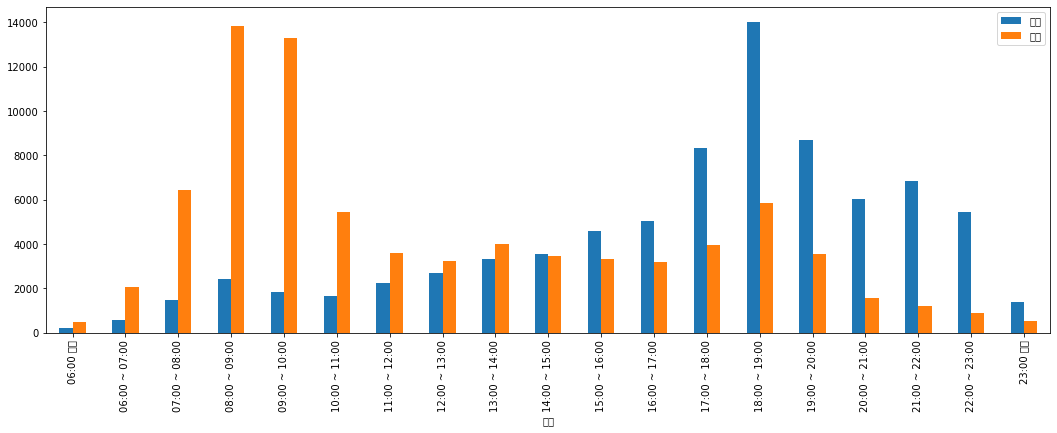

In [10]:
#강남역 월요일 데이터를 가지고 시각화한 모양
mg.plot.bar(x= "시간", figsize=(18,6))

In [11]:
#화요일
tue_gangnam = gangnam[gangnam["요일"] == "Tuesday"]
tue_gangnam

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
2,2호선,강남,Tuesday,승차,263.0,629.0,1519.0,2426.0,1815.0,1655.0,...,3634.0,4648.0,5193.0,8493.0,13841.0,8519.0,6260.0,7312.0,5933.0,1583.0
3,2호선,강남,Tuesday,하차,474.0,2018.0,6392.0,13747.0,13171.0,5480.0,...,3536.0,3353.0,3271.0,4164.0,6290.0,3903.0,1620.0,1266.0,1027.0,592.0


<AxesSubplot:xlabel='시간'>

/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/ba

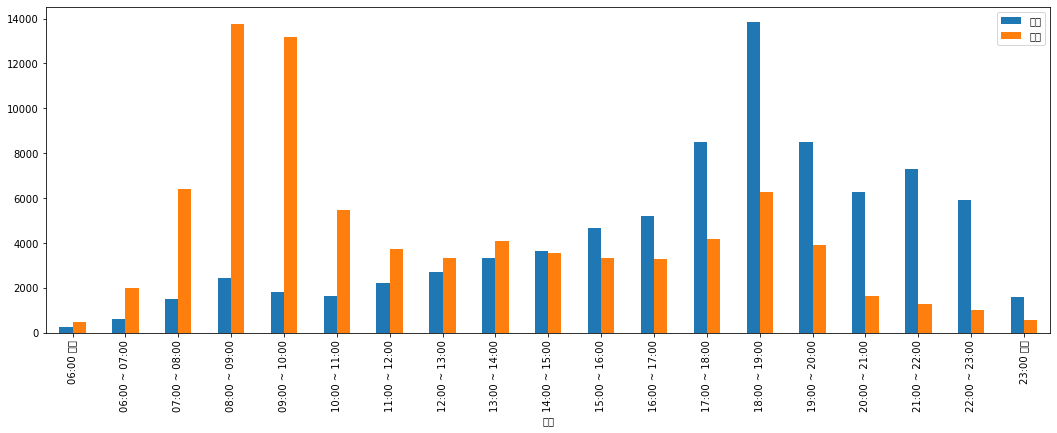

In [12]:
#위 과정을 반복
tg = tue_gangnam.transpose().reset_index()
tg = tg.loc[4:22].reset_index(drop=True)
tg.columns = ["시간", "승차", "하차"]
tg.plot.bar(x= "시간", figsize=(18,6))

In [13]:
#수요일
wed_gangnam = gangnam[gangnam["요일"] == "Wednesday"]
wed_gangnam

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
4,2호선,강남,Wednesday,승차,276.0,628.0,1508.0,2411.0,1801.0,1639.0,...,3615.0,4595.0,5121.0,8610.0,13689.0,8286.0,6016.0,7396.0,6221.0,1762.0
5,2호선,강남,Wednesday,하차,472.0,2006.0,6280.0,13437.0,12778.0,5378.0,...,3506.0,3357.0,3339.0,4301.0,6498.0,4009.0,1646.0,1307.0,1058.0,643.0


<AxesSubplot:xlabel='시간'>

/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/ba

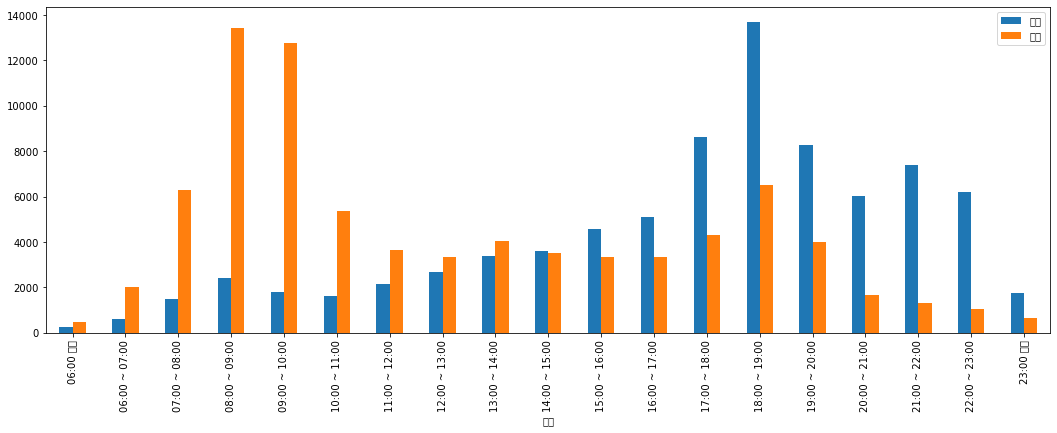

In [14]:
#위 과정을 반복
wg = wed_gangnam.transpose().reset_index()
wg = wg.loc[4:22].reset_index(drop=True)
wg.columns = ["시간", "승차", "하차"]
wg.plot.bar(x= "시간", figsize=(18,6))

In [15]:
#목요일
thr_gangnam = gangnam[gangnam["요일"] == "Thursday"]
thr_gangnam

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
6,2호선,강남,Thursday,승차,285.0,634.0,1498.0,2400.0,1824.0,1621.0,...,3656.0,4632.0,5219.0,8464.0,13570.0,8214.0,6120.0,7440.0,6373.0,1876.0
7,2호선,강남,Thursday,하차,471.0,1993.0,6234.0,13484.0,12756.0,5430.0,...,3538.0,3378.0,3380.0,4367.0,6552.0,4134.0,1697.0,1348.0,1130.0,677.0


<AxesSubplot:xlabel='시간'>

/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/ba

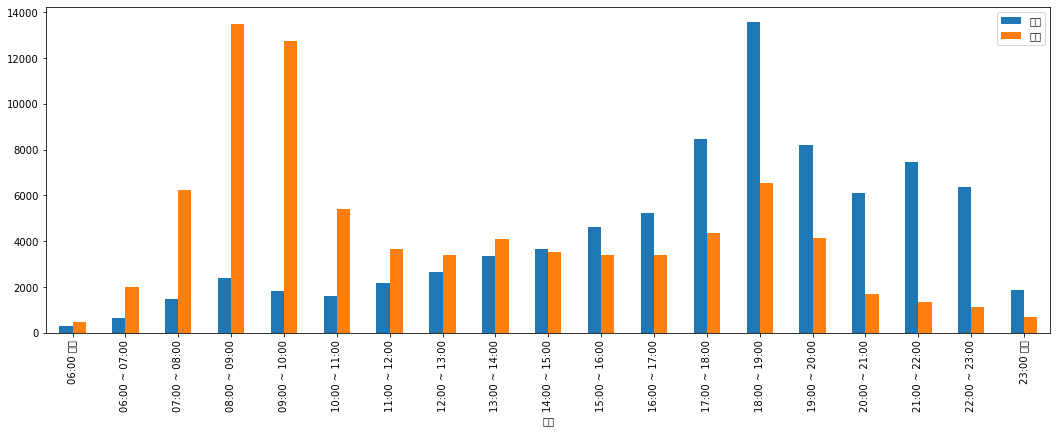

In [16]:
#위 과정을 반복
thg = thr_gangnam.transpose().reset_index()
thg = thg.loc[4:22].reset_index(drop=True)
thg.columns = ["시간", "승차", "하차"]
thg.plot.bar(x= "시간", figsize=(18,6))

In [17]:
#금요일
fri_gangnam = gangnam[gangnam["요일"] == "Friday"]
fri_gangnam

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
8,2호선,강남,Friday,승차,287.0,626.0,1479.0,2342.0,1777.0,1690.0,...,3901.0,4981.0,5771.0,9273.0,13908.0,8444.0,6076.0,7216.0,7066.0,2570.0
9,2호선,강남,Friday,하차,467.0,1980.0,6082.0,13180.0,12681.0,5581.0,...,3851.0,3753.0,3855.0,5118.0,8020.0,5408.0,2101.0,1522.0,1342.0,920.0


<AxesSubplot:xlabel='시간'>

/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/ba

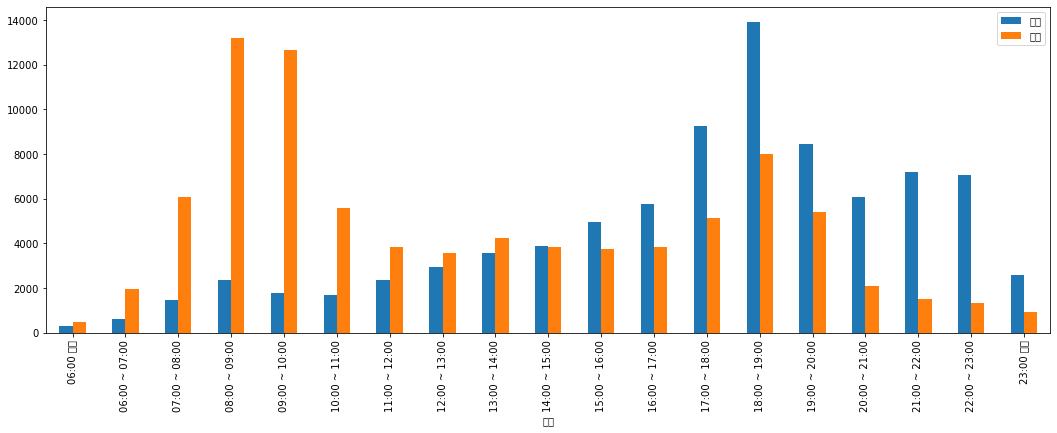

In [18]:
#위 과정을 반복
fg = fri_gangnam.transpose().reset_index()
fg = fg.loc[4:22].reset_index(drop=True)
fg.columns = ["시간", "승차", "하차"]
fg.plot.bar(x= "시간", figsize=(18,6))

In [19]:
#공휴일
holi_gangnam = gangnam[gangnam["요일"] == "holiday"]
holi_gangnam

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
10,2호선,강남,holiday,승차,363.0,467.0,421.0,542.0,679.0,881.0,...,2216.0,2518.0,3002.0,3220.0,3075.0,2542.0,2782.0,3579.0,3333.0,1075.0
11,2호선,강남,holiday,하차,149.0,710.0,1022.0,1664.0,3053.0,2338.0,...,2709.0,2539.0,2624.0,2786.0,2612.0,1717.0,1254.0,1026.0,811.0,506.0


<AxesSubplot:xlabel='시간'>

/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/krc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/ba

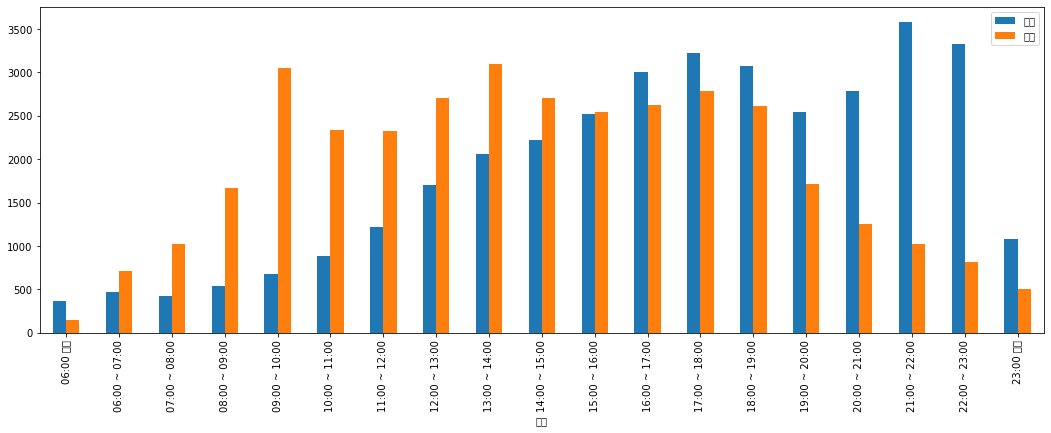

In [20]:
#위 과정을 반복
hg = holi_gangnam.transpose().reset_index()
hg = hg.loc[4:22].reset_index(drop=True)
hg.columns = ["시간", "승차", "하차"]
hg.plot.bar(x= "시간", figsize=(18,6))

## 참고사항2

### * 데이터를 시각화해서 나타낼 때 태블루로 이용을 하는데 아래와 같이 데이터를 뽑아내야 데이터를 원하는 대로 시각화할 수 있었음!!!

In [21]:
gangnam

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
0,2호선,강남,Monday,승차,228.0,597.0,1466.0,2427.0,1825.0,1655.0,...,3573.0,4581.0,5056.0,8314.0,14005.0,8680.0,6043.0,6842.0,5437.0,1384.0
1,2호선,강남,Monday,하차,469.0,2080.0,6457.0,13836.0,13276.0,5456.0,...,3484.0,3305.0,3189.0,3952.0,5854.0,3570.0,1558.0,1191.0,899.0,518.0
2,2호선,강남,Tuesday,승차,263.0,629.0,1519.0,2426.0,1815.0,1655.0,...,3634.0,4648.0,5193.0,8493.0,13841.0,8519.0,6260.0,7312.0,5933.0,1583.0
3,2호선,강남,Tuesday,하차,474.0,2018.0,6392.0,13747.0,13171.0,5480.0,...,3536.0,3353.0,3271.0,4164.0,6290.0,3903.0,1620.0,1266.0,1027.0,592.0
4,2호선,강남,Wednesday,승차,276.0,628.0,1508.0,2411.0,1801.0,1639.0,...,3615.0,4595.0,5121.0,8610.0,13689.0,8286.0,6016.0,7396.0,6221.0,1762.0
5,2호선,강남,Wednesday,하차,472.0,2006.0,6280.0,13437.0,12778.0,5378.0,...,3506.0,3357.0,3339.0,4301.0,6498.0,4009.0,1646.0,1307.0,1058.0,643.0
6,2호선,강남,Thursday,승차,285.0,634.0,1498.0,2400.0,1824.0,1621.0,...,3656.0,4632.0,5219.0,8464.0,13570.0,8214.0,6120.0,7440.0,6373.0,1876.0
7,2호선,강남,Thursday,하차,471.0,1993.0,6234.0,13484.0,12756.0,5430.0,...,3538.0,3378.0,3380.0,4367.0,6552.0,4134.0,1697.0,1348.0,1130.0,677.0
8,2호선,강남,Friday,승차,287.0,626.0,1479.0,2342.0,1777.0,1690.0,...,3901.0,4981.0,5771.0,9273.0,13908.0,8444.0,6076.0,7216.0,7066.0,2570.0
9,2호선,강남,Friday,하차,467.0,1980.0,6082.0,13180.0,12681.0,5581.0,...,3851.0,3753.0,3855.0,5118.0,8020.0,5408.0,2101.0,1522.0,1342.0,920.0


In [22]:
#parguet 저장
gangnam.to_parquet("kangnam.parquet")

In [23]:
#확인 작업 1
gn = gangnam.transpose().reset_index()
gn = gn.loc[2:22].reset_index(drop=True)
gn.columns = ["시간", "월요일승차", "월요일하차", "화요일승차", "화요일하차", "수요일승차", "수요일하차", "목요일승차", "목요일하차", "금요일승차", "금요일하차", "공휴일승차", "공휴일하차"]
gn = gn.drop([0,1]).reset_index(drop=True)
gn

,시간,월요일승차,월요일하차,화요일승차,화요일하차,수요일승차,수요일하차,목요일승차,목요일하차,금요일승차,금요일하차,공휴일승차,공휴일하차
0,06:00 이전,228.0,469.0,263.0,474.0,276.0,472.0,285.0,471.0,287.0,467.0,363.0,149.0
1,06:00 ~ 07:00,597.0,2080.0,629.0,2018.0,628.0,2006.0,634.0,1993.0,626.0,1980.0,467.0,710.0
2,07:00 ~ 08:00,1466.0,6457.0,1519.0,6392.0,1508.0,6280.0,1498.0,6234.0,1479.0,6082.0,421.0,1022.0
3,08:00 ~ 09:00,2427.0,13836.0,2426.0,13747.0,2411.0,13437.0,2400.0,13484.0,2342.0,13180.0,542.0,1664.0
4,09:00 ~ 10:00,1825.0,13276.0,1815.0,13171.0,1801.0,12778.0,1824.0,12756.0,1777.0,12681.0,679.0,3053.0
5,10:00 ~ 11:00,1655.0,5456.0,1655.0,5480.0,1639.0,5378.0,1621.0,5430.0,1690.0,5581.0,881.0,2338.0
6,11:00 ~ 12:00,2235.0,3576.0,2236.0,3716.0,2172.0,3628.0,2173.0,3658.0,2347.0,3857.0,1219.0,2326.0
7,12:00 ~ 13:00,2714.0,3236.0,2725.0,3331.0,2687.0,3350.0,2675.0,3377.0,2959.0,3551.0,1705.0,2710.0
8,13:00 ~ 14:00,3315.0,3989.0,3348.0,4092.0,3365.0,4044.0,3336.0,4100.0,3589.0,4240.0,2057.0,3100.0
9,14:00 ~ 15:00,3573.0,3484.0,3634.0,3536.0,3615.0,3506.0,3656.0,3538.0,3901.0,3851.0,2216.0,2709.0


In [25]:
#확인 작업 2
gn1 = gangnam.pivot_table(columns=["요일","구분"])
gn1

요일              Monday           Tuesday          Wednesday          Thursday  \
구분                  승차       하차       승차       하차        승차       하차       승차   
06:00 ~ 07:00    597.0   2080.0    629.0   2018.0     628.0   2006.0    634.0   
06:00 이전         228.0    469.0    263.0    474.0     276.0    472.0    285.0   
07:00 ~ 08:00   1466.0   6457.0   1519.0   6392.0    1508.0   6280.0   1498.0   
08:00 ~ 09:00   2427.0  13836.0   2426.0  13747.0    2411.0  13437.0   2400.0   
09:00 ~ 10:00   1825.0  13276.0   1815.0  13171.0    1801.0  12778.0   1824.0   
10:00 ~ 11:00   1655.0   5456.0   1655.0   5480.0    1639.0   5378.0   1621.0   
11:00 ~ 12:00   2235.0   3576.0   2236.0   3716.0    2172.0   3628.0   2173.0   
12:00 ~ 13:00   2714.0   3236.0   2725.0   3331.0    2687.0   3350.0   2675.0   
13:00 ~ 14:00   3315.0   3989.0   3348.0   4092.0    3365.0   4044.0   3336.0   
14:00 ~ 15:00   3573.0   3484.0   3634.0   3536.0    3615.0   3506.0   3656.0   
15:00 ~ 16:00   4581.0   3305.0   4648.0   3353.0    4595.0   3357.0   4632.0   
16:00 ~ 17:00   5056.0   3189.0   5193.0   3271.0    5121.0   3339.0   5219.0   
17:00 ~ 18:00   8314.0   3952.0   8493.0   4164.0    8610.0   4301.0   8464.0   
18:00 ~ 19:00  14005.0   5854.0  13841.0   6290.0   13689.0   6498.0  13570.0   
19:00 ~ 20:00   8680.0   3570.0   8519.0   3903.0    8286.0   4009.0   8214.0   
20:00 ~ 21:00   6043.0   1558.0   6260.0   1620.0    6016.0   1646.0   6120.0   
21:00 ~ 22:00   6842.0   1191.0   7312.0   1266.0    7396.0   1307.0   7440.0   
22:00 ~ 23:00   5437.0    899.0   5933.0   1027.0    6221.0   1058.0   6373.0   
23:00 이후        1384.0    518.0   1583.0    592.0    1762.0    643.0   1876.0   

요일                       Friday          holiday          
구분                  하차       승차       하차      승차      하차  
06:00 ~ 07:00   1993.0    626.0   1980.0   467.0   710.0  
06:00 이전         471.0    287.0    467.0   363.0   149.0  
07:00 ~ 08:00   6234.0   1479.0   6082.0   421.0  1022.0  
08:00 ~ 09:00  13484.0   2342.0  13180.0   542.0  1664.0  
09:00 ~ 10:00  12756.0   1777.0  12681.0   679.0  3053.0  
10:00 ~ 11:00   5430.0   1690.0   5581.0   881.0  2338.0  
11:00 ~ 12:00   3658.0   2347.0   3857.0  1219.0  2326.0  
12:00 ~ 13:00   3377.0   2959.0   3551.0  1705.0  2710.0  
13:00 ~ 14:00   4100.0   3589.0   4240.0  2057.0  3100.0  
14:00 ~ 15:00   3538.0   3901.0   3851.0  2216.0  2709.0  
15:00 ~ 16:00   3378.0   4981.0   3753.0  2518.0  2539.0  
16:00 ~ 17:00   3380.0   5771.0   3855.0  3002.0  2624.0  
17:00 ~ 18:00   4367.0   9273.0   5118.0  3220.0  2786.0  
18:00 ~ 19:00   6552.0  13908.0   8020.0  3075.0  2612.0  
19:00 ~ 20:00   4134.0   8444.0   5408.0  2542.0  1717.0  
20:00 ~ 21:00   1697.0   6076.0   2101.0  2782.0  1254.0  
21:00 ~ 22:00   1348.0   7216.0   1522.0  3579.0  1026.0  
22:00 ~ 23:00   1130.0   7066.0   1342.0  3333.0   811.0  
23:00 이후         677.0   2570.0    920.0  1075.0   506.0

In [78]:
#승하차 합을 구한 다음 그 구한 것을 따로 데이터프레임을 생성
gangnam1 = gangnam.groupby(["호선","역명","요일"]).sum().reset_index()
gangnam1 = gangnam1.drop([5,6]).reset_index(drop=True) #위에 그룹화하면서 토요일, 일요일이 생성이되서 제거하는 과정
gangnam1.insert(3,"구분","합")
gangnam1

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
0,2호선,강남,Monday,합,697.0,2677.0,7923.0,16263.0,15101.0,7111.0,...,7057.0,7886.0,8245.0,12266.0,19859.0,12250.0,7601.0,8033.0,6336.0,1902.0
1,2호선,강남,Tuesday,합,737.0,2647.0,7911.0,16173.0,14986.0,7135.0,...,7170.0,8001.0,8464.0,12657.0,20131.0,12422.0,7880.0,8578.0,6960.0,2175.0
2,2호선,강남,Wednesday,합,748.0,2634.0,7788.0,15848.0,14579.0,7017.0,...,7121.0,7952.0,8460.0,12911.0,20187.0,12295.0,7662.0,8703.0,7279.0,2405.0
3,2호선,강남,Thursday,합,756.0,2627.0,7732.0,15884.0,14580.0,7051.0,...,7194.0,8010.0,8599.0,12831.0,20122.0,12348.0,7817.0,8788.0,7503.0,2553.0
4,2호선,강남,Friday,합,754.0,2606.0,7561.0,15522.0,14458.0,7271.0,...,7752.0,8734.0,9626.0,14391.0,21928.0,13852.0,8177.0,8738.0,8408.0,3490.0
5,2호선,강남,holiday,합,512.0,1177.0,1443.0,2206.0,3732.0,3219.0,...,4925.0,5057.0,5626.0,6006.0,5687.0,4259.0,4036.0,4605.0,4144.0,1581.0


In [80]:
#따로 데이터프레임을 생성한 것을 기존 데이터프레임과 병합한 후 정렬!
k = pd.concat([gangnam1,gangnam]).reset_index(drop=True)
k = k.sort_values(["요일", "구분"]).reset_index(drop=True)
k

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
0,2호선,강남,Monday,승차,228.0,597.0,1466.0,2427.0,1825.0,1655.0,...,3573.0,4581.0,5056.0,8314.0,14005.0,8680.0,6043.0,6842.0,5437.0,1384.0
1,2호선,강남,Monday,하차,469.0,2080.0,6457.0,13836.0,13276.0,5456.0,...,3484.0,3305.0,3189.0,3952.0,5854.0,3570.0,1558.0,1191.0,899.0,518.0
2,2호선,강남,Monday,합,697.0,2677.0,7923.0,16263.0,15101.0,7111.0,...,7057.0,7886.0,8245.0,12266.0,19859.0,12250.0,7601.0,8033.0,6336.0,1902.0
3,2호선,강남,Tuesday,승차,263.0,629.0,1519.0,2426.0,1815.0,1655.0,...,3634.0,4648.0,5193.0,8493.0,13841.0,8519.0,6260.0,7312.0,5933.0,1583.0
4,2호선,강남,Tuesday,하차,474.0,2018.0,6392.0,13747.0,13171.0,5480.0,...,3536.0,3353.0,3271.0,4164.0,6290.0,3903.0,1620.0,1266.0,1027.0,592.0
5,2호선,강남,Tuesday,합,737.0,2647.0,7911.0,16173.0,14986.0,7135.0,...,7170.0,8001.0,8464.0,12657.0,20131.0,12422.0,7880.0,8578.0,6960.0,2175.0
6,2호선,강남,Wednesday,승차,276.0,628.0,1508.0,2411.0,1801.0,1639.0,...,3615.0,4595.0,5121.0,8610.0,13689.0,8286.0,6016.0,7396.0,6221.0,1762.0
7,2호선,강남,Wednesday,하차,472.0,2006.0,6280.0,13437.0,12778.0,5378.0,...,3506.0,3357.0,3339.0,4301.0,6498.0,4009.0,1646.0,1307.0,1058.0,643.0
8,2호선,강남,Wednesday,합,748.0,2634.0,7788.0,15848.0,14579.0,7017.0,...,7121.0,7952.0,8460.0,12911.0,20187.0,12295.0,7662.0,8703.0,7279.0,2405.0
9,2호선,강남,Thursday,승차,285.0,634.0,1498.0,2400.0,1824.0,1621.0,...,3656.0,4632.0,5219.0,8464.0,13570.0,8214.0,6120.0,7440.0,6373.0,1876.0


In [81]:
#parquet 저장
k.to_parquet("kangnam_station.parquet")

In [82]:
gangnam1.to_parquet("kangnam_sum.parquet")